In [73]:
import pandas as pd
import glob
folder = r"F:\Lab\nfs\base-notredame\*.csv"

In [74]:
folder = r"F:\Lab\nfs\base-notredame\stats\subject\F100\*.csv"

all_data = []
for f in glob.glob(folder):
    df = pd.read_csv(f, header=1)
    # print(df.head())
    exp_id = df['Experiment ID'][0]
    exp = exp_id.split('_')[-1]
    auc = df['AUC'][0]
    eer = df['EER'][0]
    zero_fmr = df['ZeroFMR'][0]
    fmr1000 = df['FMR1000'][0]
    fmr100 = df['FMR100'][0]
    fmr10 = df['FMR10'][0]
    fmr20 = df['FMR20'][0]
    exp_id = '_'.join(exp_id.split('_')[:-1])
    all_data.append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000, exp, 'F100'])
    # all_data[exp].append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000])
    # all_data.append(list(df.iloc[0]))
# print(all_data)

In [75]:
folder = r"F:\Lab\nfs\base-notredame\stats\subject\M100\*.csv"
for f in glob.glob(folder):
    df = pd.read_csv(f, header=1)
    # print(df.head())
    exp_id = df['Experiment ID'][0]
    exp = exp_id.split('_')[-1]
    auc = df['AUC'][0]
    eer = df['EER'][0]
    zero_fmr = df['ZeroFMR'][0]
    fmr1000 = df['FMR1000'][0]
    fmr100 = df['FMR100'][0]
    fmr10 = df['FMR10'][0]
    fmr20 = df['FMR20'][0]
    exp_id = '_'.join(exp_id.split('_')[:-1])
    all_data.append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000, exp, 'M100'])
    # all_data[exp].append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000])
    # all_data.append(list(df.iloc[0]))
# print(all_data)

In [76]:
folder = r"F:\Lab\nfs\base-notredame\stats\subject\F50M50\*.csv"
for f in glob.glob(folder):
    df = pd.read_csv(f, header=1)
    # print(df.head())
    exp_id = df['Experiment ID'][0]
    exp = exp_id.split('_')[-1]
    auc = df['AUC'][0]
    eer = df['EER'][0]
    zero_fmr = df['ZeroFMR'][0]
    fmr1000 = df['FMR1000'][0]
    fmr100 = df['FMR100'][0]
    fmr10 = df['FMR10'][0]
    fmr20 = df['FMR20'][0]
    exp_id = '_'.join(exp_id.split('_')[:-1])
    all_data.append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000, exp, 'F50M50'])
    # all_data[exp].append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000])
    # all_data.append(list(df.iloc[0]))
# print(all_data)

In [77]:
df = pd.DataFrame(all_data)
# df.head()
df[0] = df[0].apply(lambda x:x.split("_")[0])

# df = df[df[8] == "F75M25"]

df.columns = ["Experiment ID", "AUC", "EER", "ZeroFMR", "FMR10", "FMR20", "FMR100", "FMR1000", "Train Balance", "Test Balance"]

df.head()

,Experiment ID,AUC,EER,ZeroFMR,FMR10,FMR20,FMR100,FMR1000,Train Balance,Test Balance
0,DenseNet121,0.985940,0.0562,0.9118,0.0246,0.0640,0.3324,0.7522,F100,F100
1,DenseNet121,0.988485,0.0440,0.9354,0.0104,0.0364,0.2784,0.8738,F50M50,F100
2,DenseNet121,0.978797,0.0592,0.9972,0.0212,0.0730,0.5622,0.9820,M100,F100
3,EfficientNetB0,0.986770,0.0490,0.7740,0.0084,0.0472,0.4238,0.6728,F100,F100
4,EfficientNetB0,0.987763,0.0405,0.9056,0.0052,0.0246,0.4820,0.7738,F50M50,F100


In [78]:
df.to_csv(r"F:\Lab\nfs\base-notredame\Notredame_verification.csv")

In [70]:
import wandb

run = wandb.init(project='UFPR-Ocular', entity='sreeraj')

run.log({"UFPR Subject Full Results": df})

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: sreeraj (use `wandb login --relogin` to force relogin)
f:\Lab\env\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "
wandb: wandb version 0.12.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [14]:
import plotly.express as px

import plotly.graph_objects as go

# Group by Network, Train Balance, TestBalance
df_ = df[df["Train Balance"] == "F75M25"]
fig = px.bar(df_, x="Experiment ID", y="EER", color="Test Balance", 
                 title="Train Balance : F75M25",  barmode='group', log_y=True)
fig.show()

import wandb

run = wandb.init(project='UFPR-Ocular', entity='sreeraj')

run.log({"Train Balance : F75M25 (EER)": fig})


_runtime,8
_timestamp,1632756633
_step,0


_runtime,▁
_timestamp,▁
_step,▁


wandb: wandb version 0.12.2 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [62]:
import glob
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
R_ = np.zeros(256)
G_ = np.zeros(256)
B_ = np.zeros(256)
for f in tqdm(glob.glob(r"F:\Lab\datasets\fairface\fairface-img-margin025-trainval\val\*")):
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r = img[:,:, 0]
    g = img[:,:, 1]
    b = img[:,:, 2]

    R_ += np.array(np.histogram(r, bins=256, range=(0, 255),)[0])
    B_ += np.array(np.histogram(b, bins=256, range=(0, 255),)[0])
    G_ += np.array(np.histogram(g, bins=256, range=(0, 255),)[0])
    

100%|██████████| 10954/10954 [01:19<00:00, 137.65it/s]


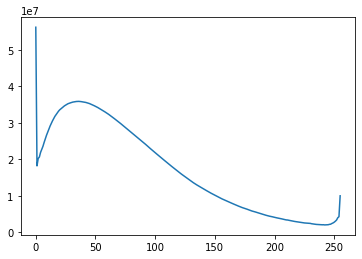

In [37]:
plt.plot(range(256), B, )

In [58]:
import glob
import tensorflow as tf
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
R = np.zeros(512)
G = np.zeros(512)
B = np.zeros(512)
for f in tqdm(glob.glob(r"F:\Lab\datasets\fairface\fairface-img-margin025-trainval\val\*")):
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = tf.keras.applications.resnet.preprocess_input(img)
    r = img[:,:, 0]
    g = img[:,:, 1]
    b = img[:,:, 2]
    R += np.array(np.histogram(r, bins=512, range=(-256, 255),)[0])
    B += np.array(np.histogram(b, bins=512, range=(-256, 255),)[0])
    G += np.array(np.histogram(g, bins=512, range=(-256, 255),)[0])
    

100%|██████████| 10954/10954 [01:08<00:00, 159.39it/s]


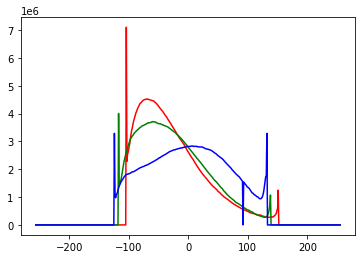

wandb: Network error resolved after 0:00:39.650741, resuming normal operation.


In [72]:
# plt.plot(range(256), R_, color='r')
# plt.plot(range(256), G_, color='g')
# plt.plot(range(256), B_, color='b')
plt.plot(range(-256, 256), R, color='r')
plt.plot(range(-256, 256), G , color='g')
plt.plot(range(-256, 256), B , color='b')

In [ ]:
import wandb

run = wandb.init(project='UFPR-Ocular', entity='sreeraj')


import plotly.express as px


my_table = wandb.Table(columns=["Experiment ID", "AUC", "EER", "ZeroFMR", "FMR10", "FMR20", "FMR100", "FMR1000", "DataBalance"], data=df)
run.log({"verification_table15": my_table})

In [ ]:
header = list(df.iloc[0])
header[-5:] = list(df.columns)[-5:]


df_new = pd.DataFrame(all_data, columns=header)

df_new.head()
# df_new.to_csv(r"F:\Lab\nfs\base\stats\open_world_f75m25.csv")

In [ ]:
gender_df = pd.read_csv(r"F:\Lab\datasets\UFPR-Periocular\UFPR-Periocular\experimentalProtocol\open_world_valopen\test_fold1.txt", header=None, sep=' ', usecols=[0, 3])
gender_df[0] = gender_df[0].apply(lambda x: x.split('.')[0][:-1] + '.jpg')

gender_df = gender_df[gender_df[3] == 1]
# gender_df[0] = gender_df[0].apply(lambda x: os.path.join(train_dir, x))
gender_df.head()


In [ ]:
gender_df[2] = gender_df[0].apply(lambda x: x[1:5])

In [ ]:
def generate(num=5000):
    res = []
    from random import choice

    # select same
    for i in range(num):
        elem1 = gender_df.sample()
        elem2 = gender_df[gender_df[2] == elem1[2].iloc[0]].sample()
        while elem1[0].iloc[0] == elem2[0].iloc[0]:
            elem2 = gender_df[gender_df[2] == elem1[2].iloc[0]].sample()
        res.append((elem1[0].iloc[0], elem2[0].iloc[0], 0))
    

    for i in range(num):
        elem1 = gender_df.sample()
        elem2 = gender_df[gender_df[2] != elem1[2].iloc[0]].sample()
        res.append((elem1[0].iloc[0], elem2[0].iloc[0], 1))
    return res
df = generate()

df = pd.DataFrame(df)

df.head()

In [ ]:
df[df[0] == df[1]]

In [85]:
import shutil

import pandas as pd
import os

df = pd.read_csv(r"F:\Lab\nfs\base-notredame\weights.txt", header=None)

df = df[0]
for f in df:
    fn = f.split(os.path.sep)
    fn[-2] = "final_weights"
    fn = os.path.sep.join(fn)
    shutil.move(f, fn)

In [18]:
from glob import glob
import numpy as np
import pandas as pd

df = pd.read_csv(r"F:\Lab\nfs\nsf-ocular-bias\content\updates\notredame-results\assets\Notredame_gender.csv")
df = df[df['Train Balance'] == 'F75M25']
df.to_csv('test.csv', sep=' ')